# Identifying  Restaurant Hotspots with a Gaussian Mixture Model

In [4]:
#imports
import numpy as np
import pandas as pd

import sklearn.mixture as sm
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium

# GMM Assumptions

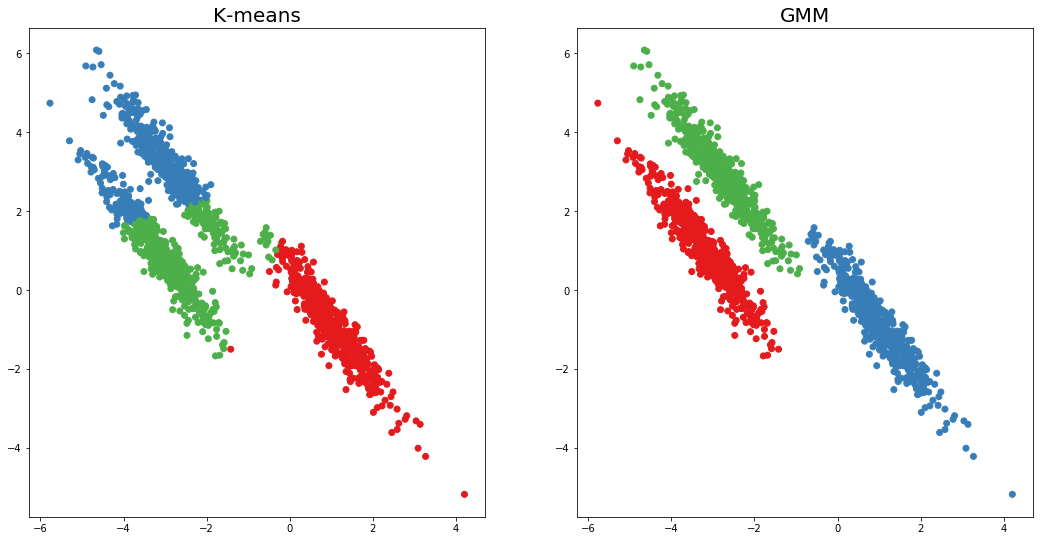

In [2]:
#Non spherical clusters 
plt.figure(figsize=(18, 9))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

#K-means
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(121)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred,cmap='Set1',vmin=0, vmax=7)
plt.title("K-means",size=20)

#GMM
gmm = sm.GaussianMixture(n_components=3, random_state=11,n_init=5)
y_pred = gmm.fit(X_aniso).predict(X_aniso)

plt.subplot(122)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred,cmap='Set1',vmin=0, vmax=7)
plt.title("GMM",size=20)

plt.savefig('../figures/gmm_comp1.png',format='png')

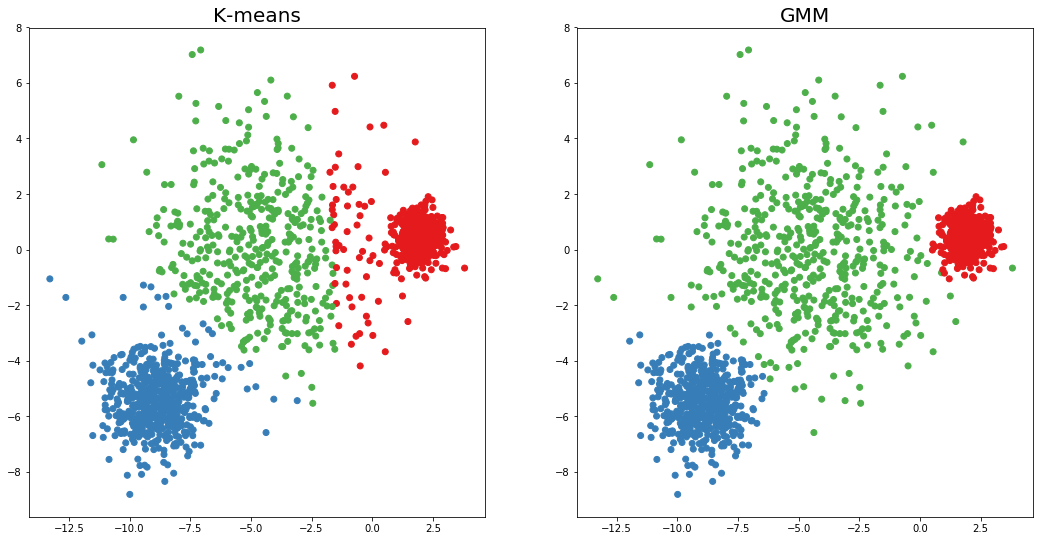

In [3]:
# Different variance
plt.figure(figsize=(18, 9))

n_samples = 1500
random_state = 170

X, y = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)

#K-means
labels = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=labels,cmap='Set1',vmin=0, vmax=7)
plt.title("K-means",size=20)

#GMM
gmm = sm.GaussianMixture(n_components=3, random_state=11,n_init=5)
labels = gmm.fit(X).predict(X)

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=labels,cmap='Set1',vmin=0, vmax=7)
plt.title("GMM",size=20)

plt.savefig('../figures/gmm_comp2.png',format='png')

# Dataset

In [1]:
import pandas as pd

data = pd.read_csv("../data/toronto_restaurant.csv",usecols=['name','latitude','longitude'])
data.head()

name  latitude  longitude
0                     Alize Catering  43.71140  -79.39934
1             Chula Taberna Mexicana  43.66926  -79.33590
2                    Sunnyside Grill  43.78182  -79.49043
3  Bampot House of Tea & Board Games  43.66158  -79.40888
4                       Thai Express  43.77488  -79.49462

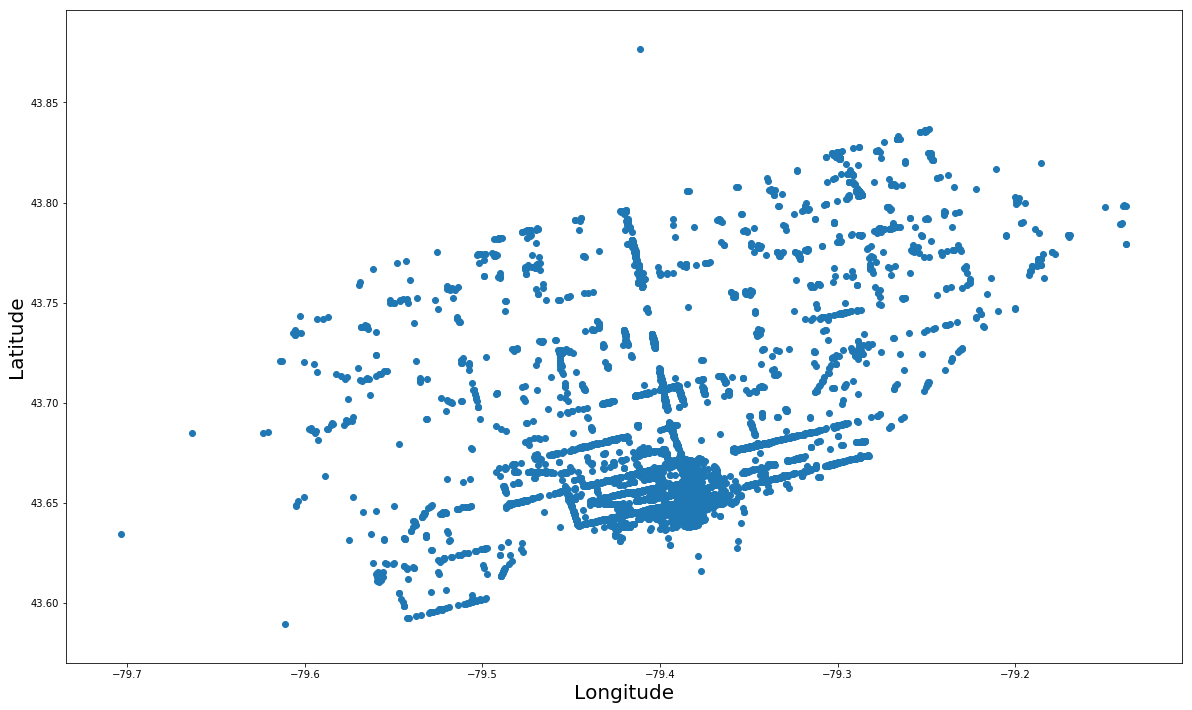

In [35]:
# Different variance
plt.figure(figsize=(20, 12))

plt.subplot(111)
plt.scatter(data['longitude'],data['latitude'])
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)

plt.savefig('../figures/gmm_data.png',format='png')

# Fitting the clusters

In [4]:
import sklearn.mixture as sm
import matplotlib.pyplot as plt
%matplotlib inline

def plot_gmm(n):
    """
    Plot results of a gmm using n clusters
    """
    
    #Fit gmm and get labels
    x = data[['longitude','latitude']].values
    gmm = sm.GaussianMixture(n_components=n, random_state=11,n_init=5)
    labels = gmm.fit(x).predict(x)
    
    #assign a colour to each label
    colour = ['#f54242','#4287f5','#f59942','#f5f242','#69f542','#b342f5']
    #colour = ['#4287f5','#f59942','#f5f242', '#f54242' ,'#b342f5','#69f542']
    c = [colour[l] for l in labels]
    
    #scatter plot
    plt.figure(figsize=(20, 12))
    plt.scatter(x=x[:, 0], y=x[:, 1], c=c, s=40, cmap='Set1', zorder=1)
    plt.title('Number of Clusters: {}'.format(n),size=25)
    plt.xlabel('Longitude',size=20)
    plt.ylabel('Latitude',size=20)
    
    plt.savefig('../figures/gmm_{}.png'.format(n),format='png')
    

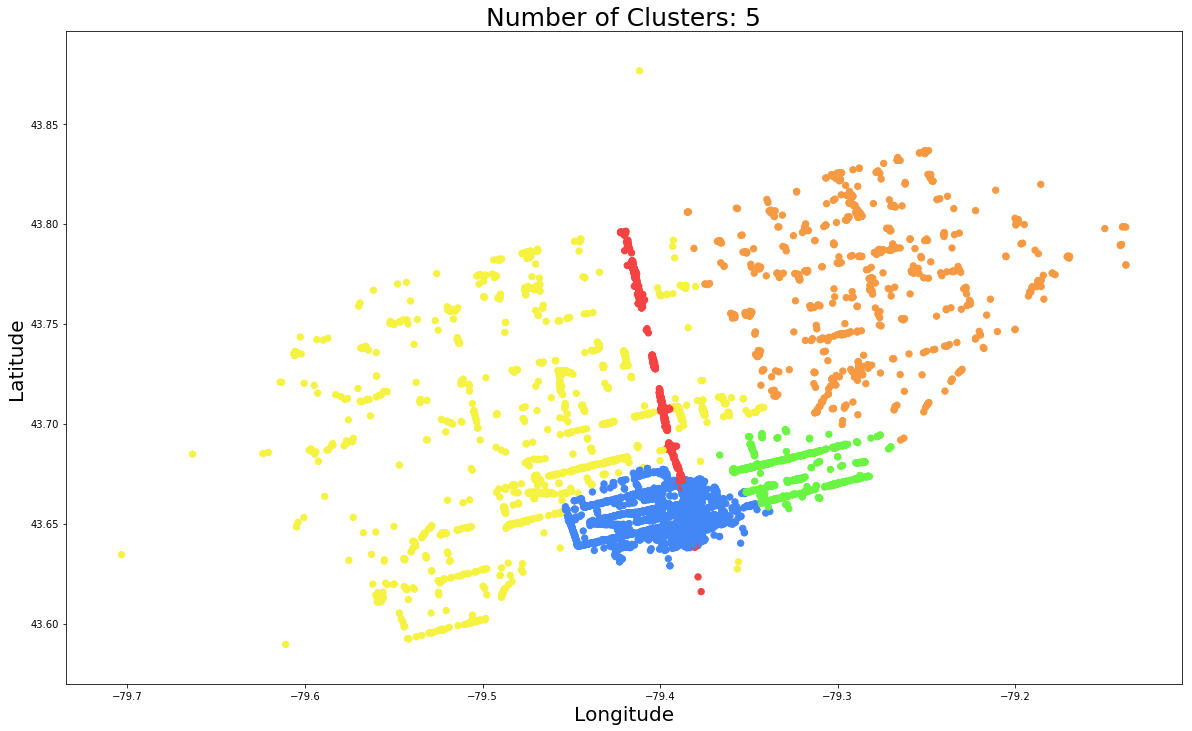

In [5]:
plot_gmm(5)

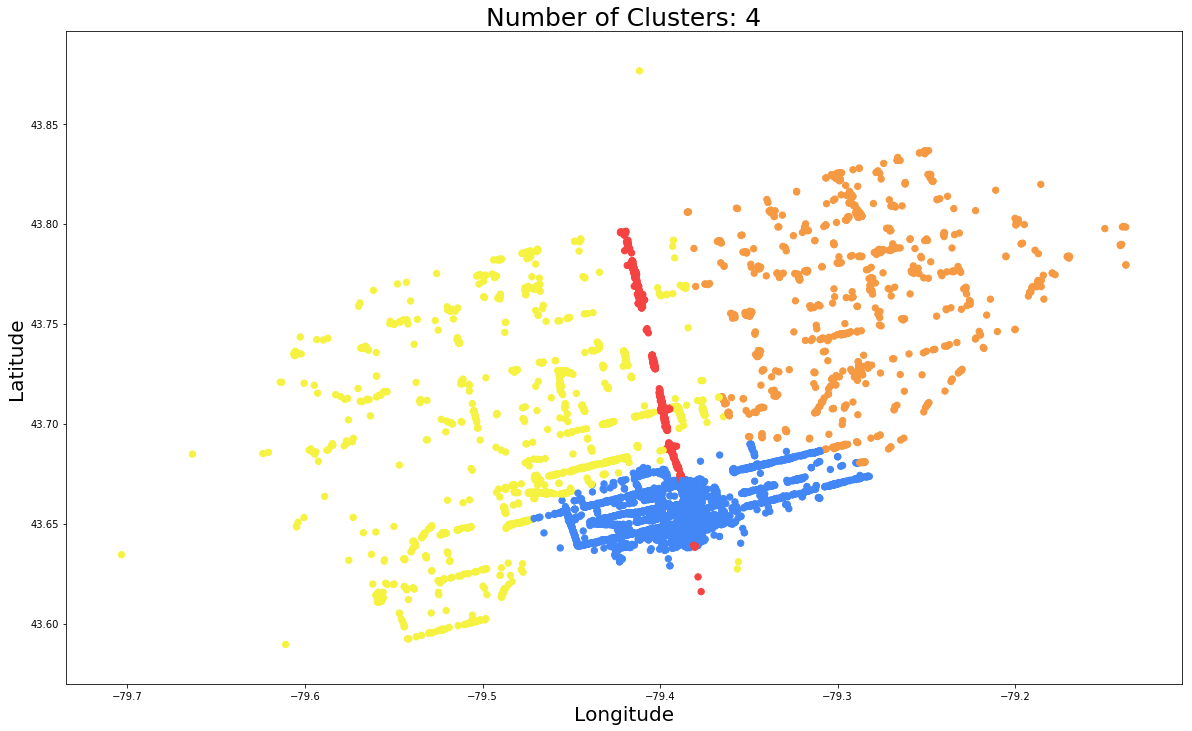

In [73]:
plot_gmm(4)

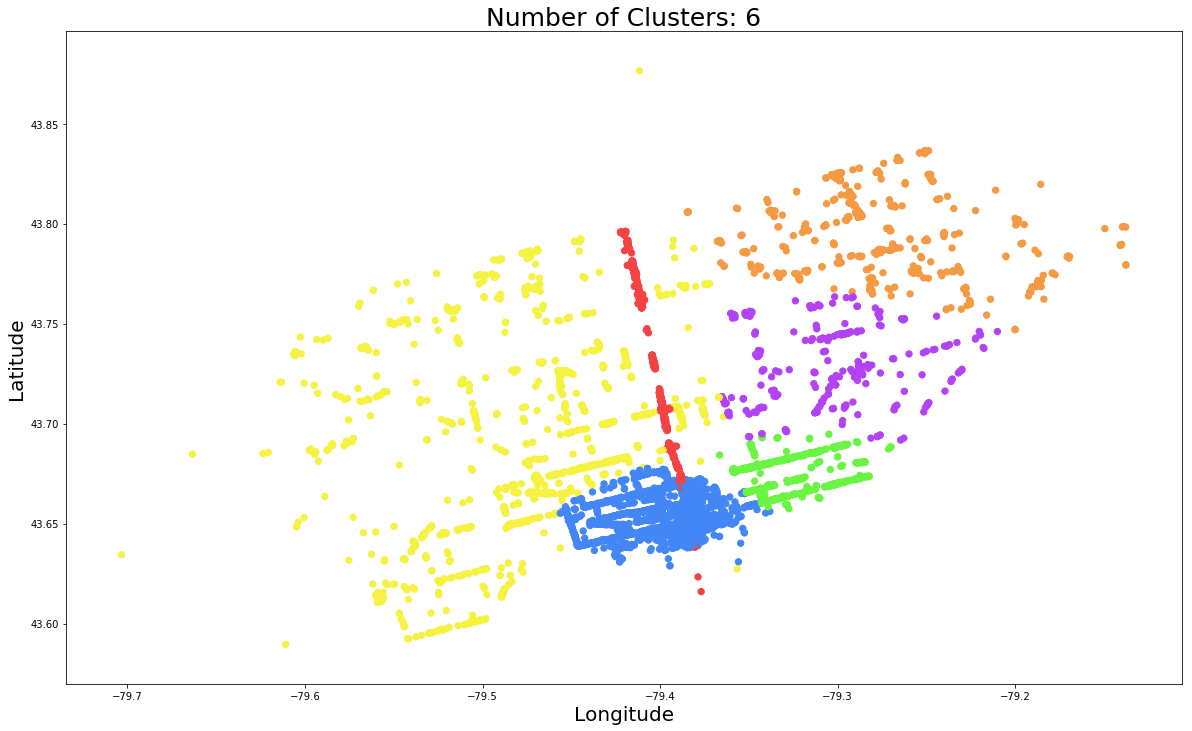

In [9]:
plot_gmm(6)

# Analyse Clusters

In [8]:
import folium

#Get gmm predictions
x = data[['longitude','latitude']].values
gmm = sm.GaussianMixture(n_components=5, random_state=11,n_init=5)
labels = gmm.fit(x).predict(x)

#create folium map 
m = folium.Map(
    location=[43.77923, -79.41731999999998],
    zoom_start=12,
    tiles='Stamen Terrain'
)

colour = ['#f54242','#4287f5','#f59942','#f5f242','#69f542','#b342f5']

#add markers to map 
for i in range(len(x)):
    lon = x[i][0]
    lat = x[i][1]
    label = labels[i]
    
    #assign colour based on label 
    c = colour[label]
    
    #add marker
    folium.CircleMarker(location=[lat,lon],
                        radius=2,
                        color=c,
                        fill_color=c).add_to(m) 

m.save('../figures/map.html')
#display map
m